# Discrete Fourier transform

<style>
.MathJax {
  font-family: "Common HTML";
}
</style>

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
\newcommand{\loss}{\ell}
\newcommand{\eloss}{\mc{L}}
\newcommand{\abs}[1]{| #1 |}
\newcommand{\norm}[1]{\| #1 \|}
\newcommand{\tp}{T}
$$


__<div style="text-align: right"> ASE3001: Computational Experiments for Aerospace Engineering, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_

<br>

---

<br>

In this section, we will generate simple sound signals and analyze them in the frequency domain, by using discrete Fourier transform.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#원래 신호와 복소수와 내적을 해서 결과를 출력한다. 

First, an extremely short review of the discrete Fourier transform. The discrete Fourier transform transforms a sequence of $N$ complex numbers $x_0, x_1,\dots, x_{N-1}$ into another sequence of complex numbers, $X_0, X_1, \dots, X_{N-1}$ defined by

\begin{align}
  X_k &= \sum_{n=0}^{N-1}x_n e^{-j2\pi kn/N}  \\
  &= \sum_{n=0}^{N-1}x_n \left\{\cos\left(2\pi kn/N\right)-j\sin\left(2\pi kn/N\right)\right\} \\
\end{align}

where the last expression follows from $e^{j\theta} = \cos\theta + j\sin\theta$.

The transform is sometimes denoted by the symbol $\mf{F}$, as in $X=\mf{F}\{x\}$, $\mf{F}(x)$, or simply $\mf{F}x$.

The above can be interpreted as the discrete analogy of the Fourier series

\begin{align}
  x_n = \frac{1}{N}\sum_{k=0}^{N-1}X_k e^{j2\pi kn/N}
\end{align}

which is the inverse Fourier transform, where $X_k$ is a complex number that contains both amplitude and phase of a complex sinusoidal component of $x_n$.


<br>

The discrete Fourier transform is linear, so can be expressed by a matrix multiplication $X=\mf{F}\{x\}=Wx$ where

$$
X=\bmat{X_0 \\ X_1 \\ X_2 \\ \vdots \\ X_{N-1}}
= \bmat{
1 & 1 & 1 &  \cdots & 1 \\
1 & \omega & \omega^2 &  \cdots & \omega^{N-1} \\
1 & \omega^2 & \omega^4 & \cdots & \omega^{2(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & \omega^{N-1} & \omega^{2(N-1)} & \cdots & \omega^{(N-1)(N-1)}
}
\bmat{x_0 \\ x_1 \\ x_2 \\ \vdots \\ x_{N-1}}
= Wx
$$

with $\omega = e^{-j2\pi/N}$, which is just the $N$-th root of $1$.

The inverse tranform is then given by the inverse of the above, so $x = \mf{F}^{-1}\{X\} = W^{-1}X$

$$
  W^{-1} = \frac{1}{N}W^H
$$

For example, let us look at the 32 point DFT matrix ($N=32$).

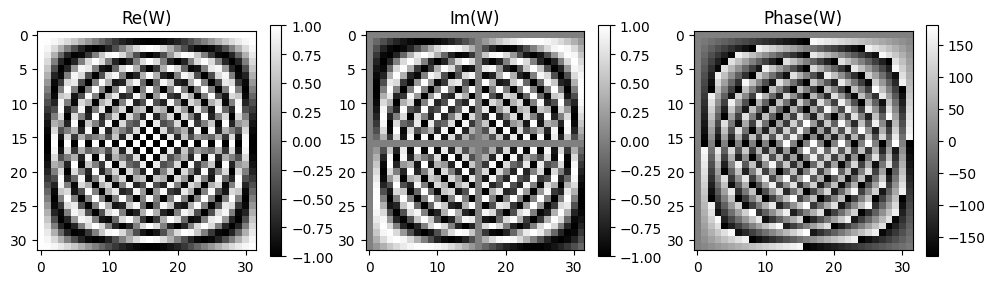

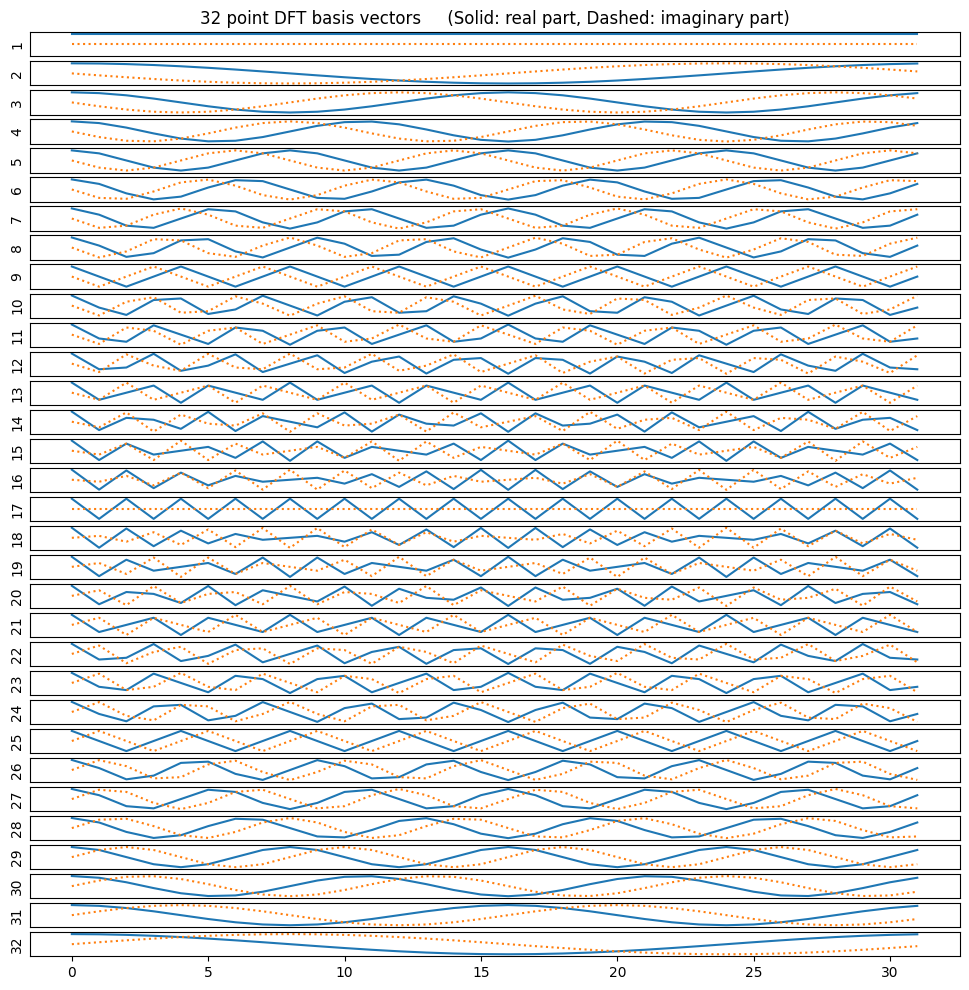

In [ ]:
N = 32
omega = np.exp(-1j*2*np.pi/N)
W = np.ones((N,N), dtype=complex)
for i in range(1,N):
  for j in range(i,N):
    W[i,j] = omega**(i*j)
    W[j,i] = W[i,j]

diff = np.linalg.inv(W) - np.conj(W)/N
np.linalg.norm(diff)

plt.figure(figsize=(12,3), dpi=100)
plt.subplot(131)
plt.imshow(W.real, cmap='gray')
plt.title('Re(W)')
plt.colorbar()
plt.subplot(132);
plt.imshow(W.imag, cmap='gray')
plt.title('Im(W)')
plt.colorbar()
plt.subplot(133);
plt.imshow(np.angle(W)*180/np.pi, cmap='gray')
plt.title('Phase(W)')
plt.colorbar()
plt.show()

plt.figure(figsize=(12,12), dpi=100)
for i in range(N):
  plt.subplot(N,1,i+1)
  if i==0:
    plt.title(f'{N} point DFT basis vectors \
    (Solid: real part, Dashed: imaginary part)')
  plt.plot(W[i,:].real, label='Re')
  plt.plot(W[i,:].imag, ':', label='Im')
  plt.yticks([])
  if i!=N-1:
    plt.xticks([])
  plt.ylim(-1.2,1.2)
  plt.ylabel(f'{i+1}')
plt.show()



This implies that each component in the Fourier transform is just the inner product of the signal with these basis vectors. So the Fourier transform explains how much of those various frequency components the original signal contains.

<br>

___

<br>

We will create a sound sample by using sine waves, $x_l(t)$ and $x_r(t)$, with two slightly different frequencies.

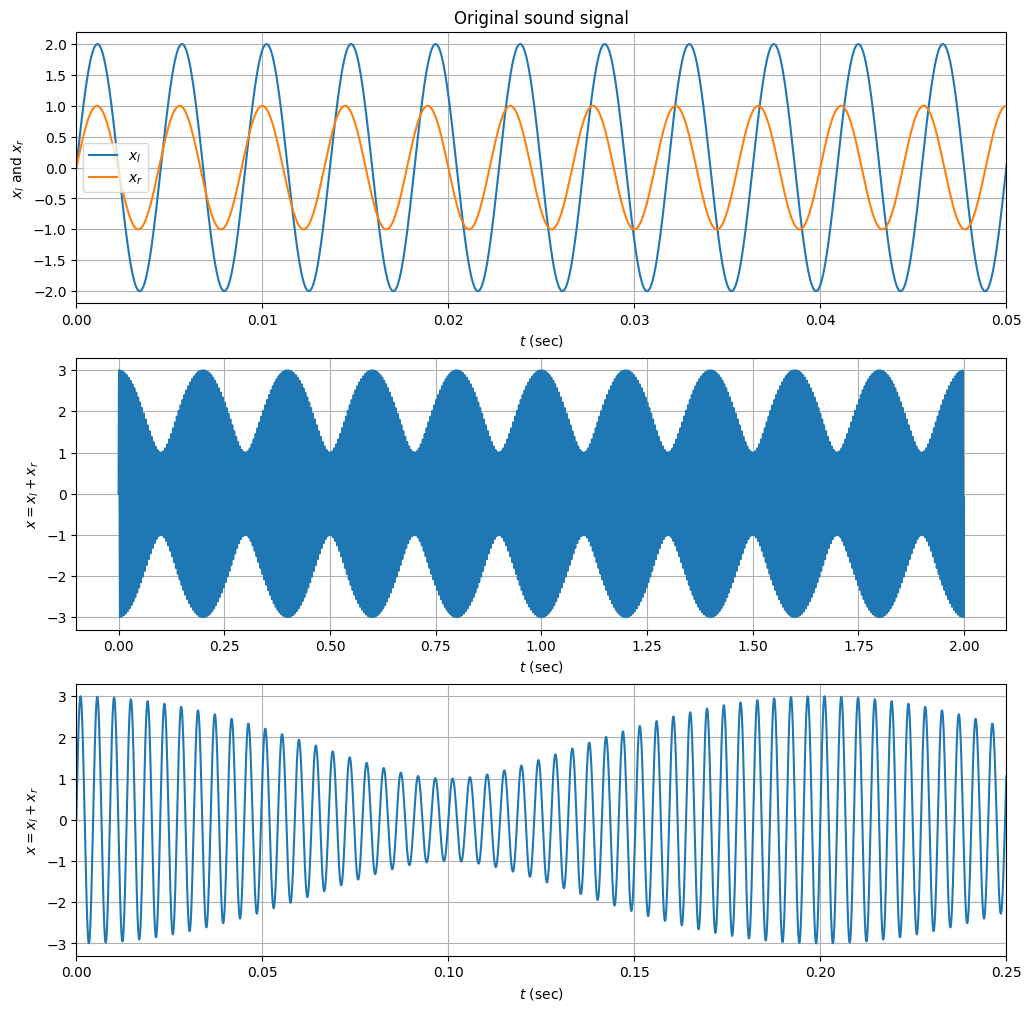

In [ ]:
# Create a sound
fs = 44100
dt = 1/fs
t = np.arange(0,2,dt)
xl = 2*np.sin(2*np.pi*220*t)
xr = np.sin(2*np.pi*225*t)
#t = t[:fs]
#xl=xl[:fs]
#xr=xr[:fs]
x = xl + xr

plt.figure(figsize=(12,12), dpi=100)
plt.subplot(311)
plt.plot(t,xl, label=r'$x_l$')
plt.plot(t,xr, label=r'$x_r$')
plt.xlim(0,0.05)
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$x_l$ and $x_r$')
plt.title('Original sound signal')
plt.grid()
plt.legend()
plt.subplot(312)
plt.plot(t,x)
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$x=x_l + x_r$')
plt.grid()
plt.subplot(313)
plt.plot(t,x)
plt.xlim(0,0.25)
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$x=x_l + x_r$')
plt.grid()
plt.show()

<br>

We can synthesize $x(t) = x_l(t)+x_r(t)$ and play $x(t)$ in mono,

In [ ]:
from IPython.display import Audio

# play in mono
Audio(x, rate=fs, autoplay=True)

or play $x_l$ and $x_r$ in stereo.

In [ ]:
# play in stereo
Audio([xl, xr], rate=fs, autoplay=True)


In acoustics, a _beat_ is an interference pattern between two sounds of slightly different frequencies, perceived as a periodic variation in volume whose rate is the difference of the two frequencies. This is what you hear from the above.

<br>

Now we can take Fourier transform of $x$, by using `numpy.fft.fft()` function. You can form the complex DFT matrix , $W\in\C^{N\times N}$, and compute $\mf{F}\{x\} = Wx$ for small $N$, but not recommended for large $N$, like $N=88200$ as in our case.

In [ ]:
N, 1/dt

(32, 44100.0)

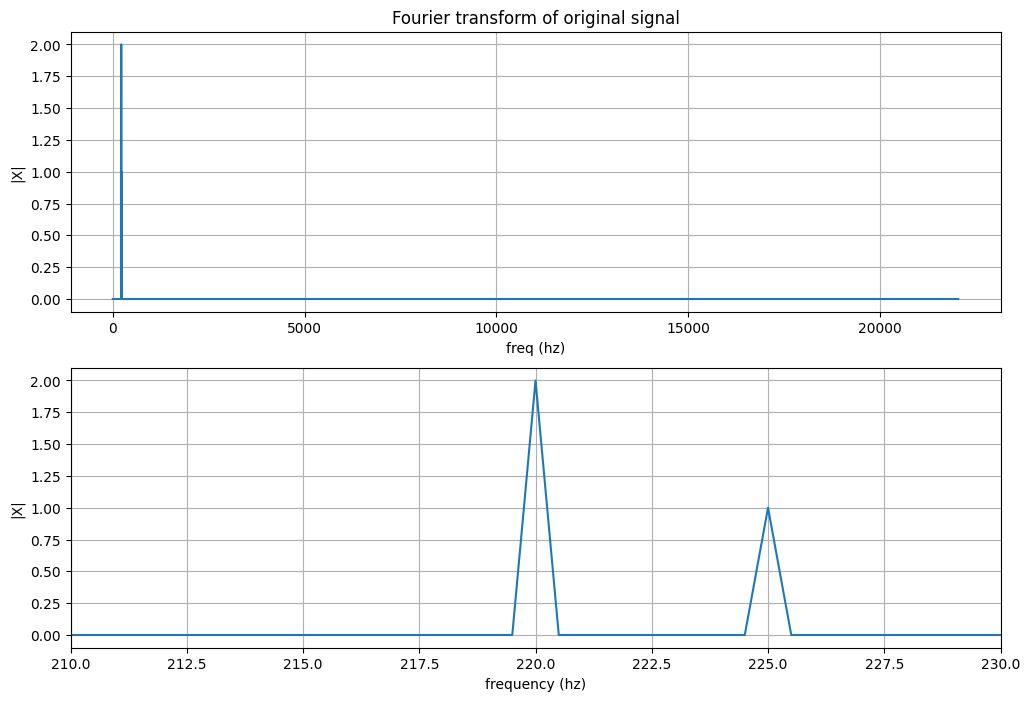

In [ ]:
N = len(x)

df = fs/N                 # df = fs/N
f = np.arange(0,N)*df     # f = [0, df, 2*df,..., (N-1)*df]

X = np.fft.fft(x)*dt

plt.figure(figsize=(12,8), dpi=100)
plt.subplot(211)
plt.plot(f[0:int(N/2+1)],np.abs(X[0:int(N/2+1)]))
plt.xlabel('freq (hz)')
plt.ylabel(r'|X|')
plt.title('Fourier transform of original signal')
plt.grid()
plt.subplot(212)
plt.plot(f[0:int(N/2+1)],np.abs(X[0:int(N/2+1)]))
plt.xlabel('frequency (hz)')
plt.ylabel(r'|X|')
plt.grid()
plt.xlim(210,230)
plt.show()

<br>

Note that the two frequency components are clearly visible from the Fourier transform. Recall that our time-series signal was,

$$
  x(t) =2\sin(2\pi\times 220t)  + \sin(2\pi\times 225t)
$$

<br>

Now we will add some noise to the sound signal.


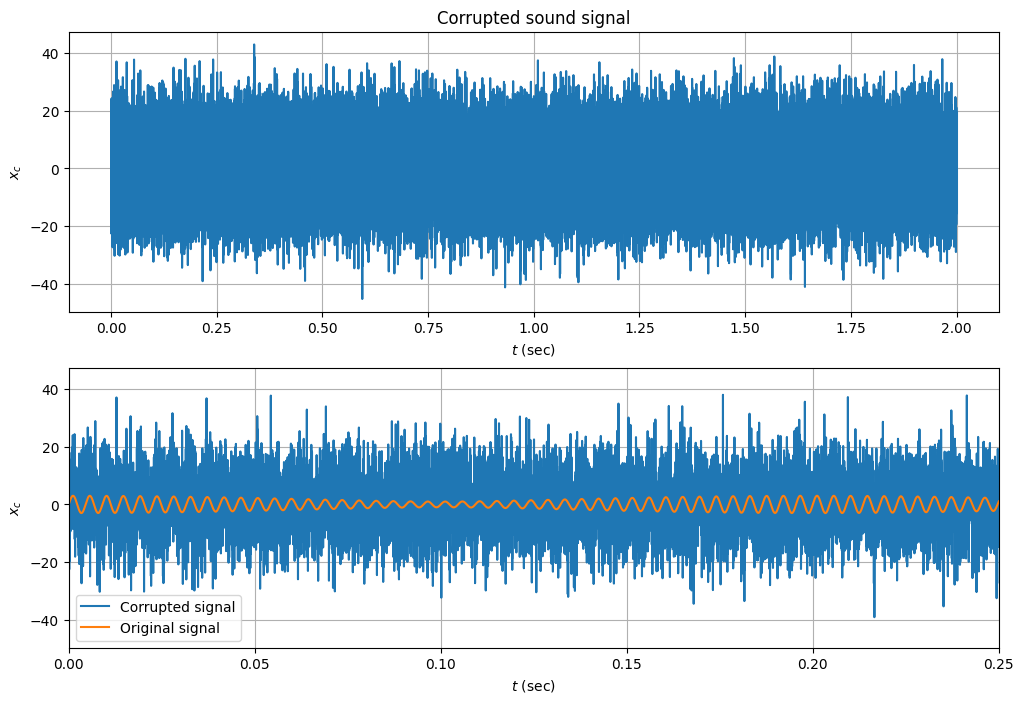

In [ ]:
np.random.seed(1)
x_c = x + 10*np.random.randn(len(x))

plt.figure(figsize=(12,8), dpi=100)
plt.subplot(211)
plt.plot(t,x_c)
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$x_c$')
plt.title('Corrupted sound signal')
plt.grid()
plt.subplot(212)
plt.plot(t,x_c, label='Corrupted signal')
plt.plot(t,x, label='Original signal')
plt.xlim(0,0.25)
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$x_c$')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# play corrupted signal
Audio(x_c, rate=fs, autoplay=True)

<br>

The corrupted signal pretty much sounds like the hissy "shhh" that sounds when the radio is mis-tuned to a wrong frequency. Can you identify the _beat_ that we had in the original sound? Barely.

We would like to reconstruct the clean _beat_ from the corrupted signal by removing the noise from it.
However, separating the noise out from the corrupted time-series signal looks quite difficult.
Instead, we will work it out in the frequency domain. Taking the Fourier transform shows a broad-band noise components spread out everywhere.

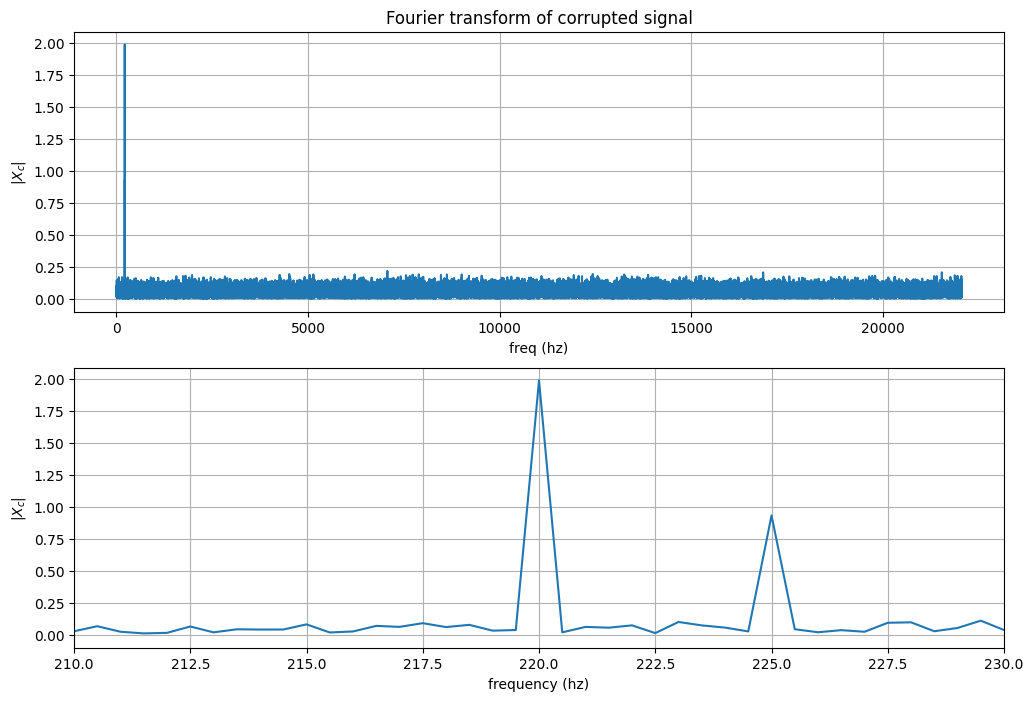

In [ ]:
df = fs/N                 # df = fs/N
f = np.arange(0,N)*df     # f = [0, df, 2*df,..., (N-1)*df]

X_c = np.fft.fft(x_c)*dt

plt.figure(figsize=(12,8), dpi=100)
plt.subplot(211)
plt.plot(f[0:int(N/2+1)],np.abs(X_c[0:int(N/2+1)]))
plt.xlabel('freq (hz)')
plt.ylabel(r'$|X_c|$')
plt.title('Fourier transform of corrupted signal')
plt.grid()
plt.subplot(212)
plt.plot(f[0:int(N/2+1)],np.abs(X_c[0:int(N/2+1)]))
plt.xlabel('frequency (hz)')
plt.ylabel(r'$|X_c|$')
plt.grid()
plt.xlim(210,230)
plt.show()

<br>

Then we can truncate the small components from the Fourier transform. For example, we can take the Fourier components with magnitude less than 0.1 as noise.

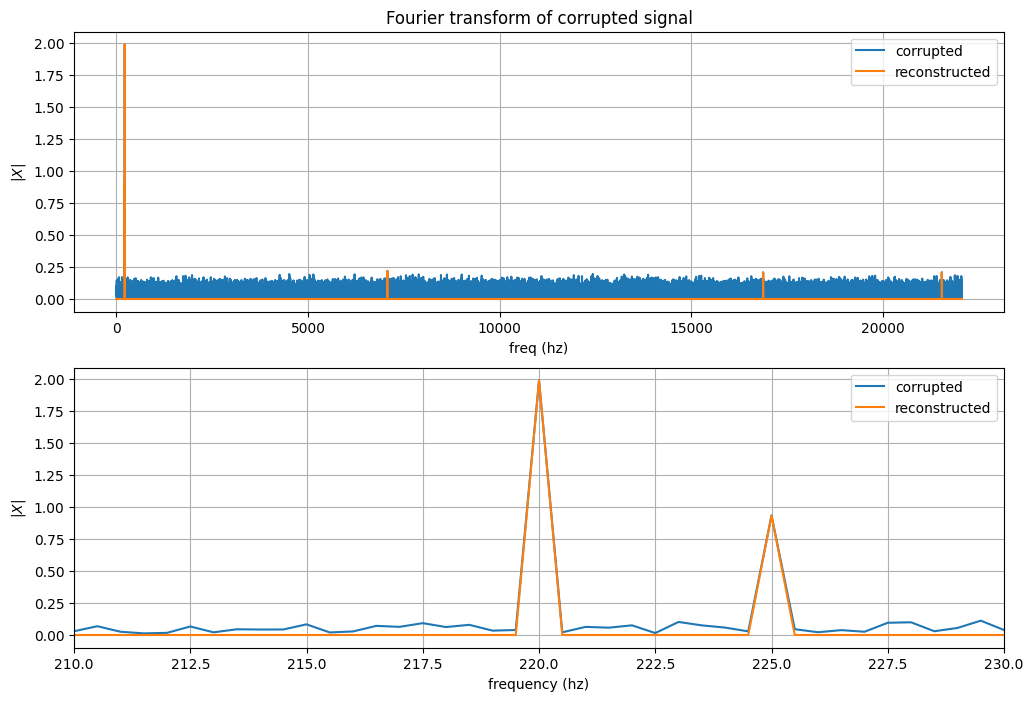

In [ ]:
X_recon = np.copy(X_c)
X_recon[np.abs(X_recon)<0.1*np.max(np.abs(X_recon))] = 0

plt.figure(figsize=(12,8), dpi=100)
plt.subplot(211)
plt.plot(f[0:int(N/2+1)],np.abs(X_c[0:int(N/2+1)]), label='corrupted')
plt.plot(f[0:int(N/2+1)],np.abs(X_recon[0:int(N/2+1)]), label='reconstructed')
plt.xlabel('freq (hz)')
plt.ylabel(r'$|X|$')
plt.legend()
plt.title('Fourier transform of corrupted signal');
plt.grid()
plt.subplot(212)
plt.plot(f[0:int(N/2+1)],np.abs(X_c[0:int(N/2+1)]), label='corrupted')
plt.plot(f[0:int(N/2+1)],np.abs(X_recon[0:int(N/2+1)]), label='reconstructed')
plt.xlabel('frequency (hz)')
plt.ylabel(r'$|X|$')
plt.legend()
plt.grid()
plt.xlim(210,230)
plt.show()

<br>

The reconstructed sound signal can be computed from $X_\text{reconstructed}$ via the inverse Fourier transforml, for which we can use `numpy.fft.ifft()` as follows.

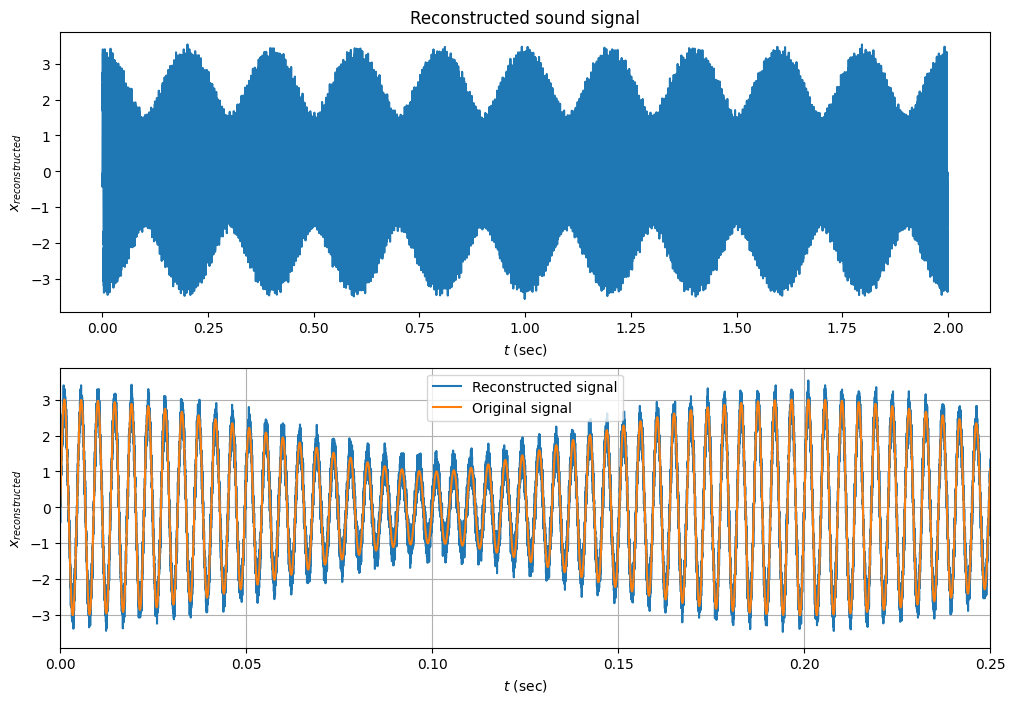

In [ ]:
x_recon = np.fft.ifft(X_recon).real*fs

plt.figure(figsize=(12,8), dpi=100)
plt.subplot(211)
plt.plot(t,x_recon)
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$x_{reconstructed}$')
plt.title('Reconstructed sound signal')
plt.subplot(212)
plt.plot(t,x_recon, label='Reconstructed signal')
plt.plot(t,x, label='Original signal')
plt.xlim(0,0.25)
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$x_{reconstructed}$')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# play reconstructed signal
Audio(x_recon, rate=fs, autoplay=True)